# Create a Custom Suite

A suite is a list of checks that will run one after the other, and its results will be displayed together.

To customize a suite, we can either:
* [Create new custom suites](#Create-a-New-Suite), by choosing the checks (and the optional conditions) that we want the suite to have.
* [Modify a built-in suite](#Modify-an-Existing-Suite) by adding and/or removing checks and conditions, to adapt it to our needs.

## Create a New Suite

Let's say we want to create our custom suite, mainly with various performance checks, including `PerformanceReport()`, `TrainTestDifferenceOverfit()` and several more.

For assistance in understanding which checks are implemented and can be included, we suggest using any of:
- API Reference (LINK)
- Check demonstration notebooks (LINK)
- Built-in suites (by printing them to see which checks they include)

In [1]:
# importing all existing checks for demonstration simplicity
from deepchecks.checks import *
from deepchecks import Suite
from sklearn.metrics import precision_score, recall_score

# The Suite's first argument is its name, and then all of the check objects.
# Some checks can receive arguments when initialized (all check arguments have default values)
# Each check can have an optional condition(/s)
# Multiple conditions can be applied subsequentially
new_custom_suite = Suite('Simple Suite For Model Performance',
    ModelInfo(),
#   PerformanceReport(alternative_metrics={'Recall': recall_score, 'Precision': precision_score}),
    PerformanceReport(),
    TrainTestDifferenceOverfit(\
                ).add_condition_degradation_ratio_not_greater_than(threshold=0.15\
                ).add_condition_difference_not_greater_than(0.3),
    ConfusionMatrixReport(),
    SimpleModelComparison(simple_model_type='constant').add_condition_ratio_not_less_than(0.9)
)

# Let's see the suite:
new_custom_suite

Simple Suite For Model Performance: [
	0: ModelInfo
	1: PerformanceReport
	2: TrainTestDifferenceOverfit
		Conditions:
			0: Train-Test metrics degradation ratio is not greater than 0.15
			1: Train-Test metrics difference is not greater than 0.3
	3: ConfusionMatrixReport
	4: SimpleModelComparison(simple_model_type=constant, maximum_ratio=50, max_depth=3, random_state=42)
		Conditions:
			0: Ratio not less than 0.9 between the given model's result and the simple model's result
]

*TIP:  
The auto-complete doesn't work from inside a suite, so if you want to use the auto-complete to see the arguments a check receive or the built-in conditions it has, try doing it outside of the suite's initialization.  
For example, to see a check's built-in conditions, type in a new cell:  
`NameOfDesiredCheck().add_condition_` and then check the auto-complete suggestions (using `Shift + Tab`).*

###  Additional Notes about Conditions in a Suite

- Checks in the built-in suites come with pre-defined conditions, and when building your custom suite you should choose which conditions to add.
- Most check classes have built-in methods for adding monditions. These apply to the naming convention `add_condition_...`, which enables adding a condition logic to parse the check's results.
- Each check instance can have several conditions or none. Each condition will be evaluated separately.
- The pass (<span style='green'>&#x2713;</span>) / fail (<span style="color: red">&#x2716;</span>) / insight (<span style="color: orange;font-weight:bold;">&#x21;</span>) status of the conditions, along with the condition's name and extra info will be displayed in the suite's Conditions Summary..
- Most conditions have configurable arguments that can be passed to the condition while adding it.
- For more info about conditions, check out Configure a Condition. (LINK)

## Run the Suite

This is simply done by calling the `run` method of the suite.

To see that in action, we'll need datasets and a model.  
Let's quickly load a dataset and train a simple model for the sake of this demo

### Load Data, Split Train-Val, and Train a Simple Model

In [2]:
# General imports
import pandas as pd
import numpy as np
np.random.seed(22)

from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Load Data
iris_df = load_iris(return_X_y=False, as_frame=True)['frame']
label_col = 'target'
df_train, df_test = train_test_split(iris_df, stratify=iris_df[label_col], random_state=0)

# Train Model
rf_clf = RandomForestClassifier()
rf_clf.fit(df_train.drop(label_col, axis=1), df_train[label_col]);

### Define Datasets

In [3]:
from deepchecks import Dataset
ds_train = Dataset(df_train, label_name=label_col, cat_features=[], use_index=False)
ds_test =  Dataset(df_test,  label_name=label_col, cat_features=[])

### Run Suite

Simple Suite For Model Performance 
 The suite is composed of various checks such as: Model Info, Performance Report, Train Test Difference Overfit, etc... 
 Each check may contain conditions (which results in 
 ✓ /
 ✖ /
 ! 
 ), as well as other outputs such as plots or tables. 
 Suites, checks and conditions can all be modified (see tutorial [link]). 
 Conditions Summary

Status,Check,Condition,More Info
✓,Train-Test Difference Overfit,Train-Test metrics degradation ratio is not greater than 0.15,
✓,Train-Test Difference Overfit,Train-Test metrics difference is not greater than 0.3,
✓,Simple Model Comparison,Ratio not less than 0.9 between the given model's result and the simple model's result,


Additional Outputs

Model Info

Summarize given model parameters.

Model Type: RandomForestClassifier

Parameter,Value,Default
bootstrap,True,True
ccp_alpha,0.00,0.00
class_weight,None,None
criterion,gini,gini
max_depth,None,None
max_features,auto,auto
max_leaf_nodes,None,None
max_samples,None,None
min_impurity_decrease,0.00,0.00
min_samples_leaf,1,1


Colored rows are parameters with non-default values

Performance Report - Test Dataset

Summarize given metrics on a dataset and model.

,Score
Metric,
Accuracy,0.95
Precision - Macro Average,0.96
Recall - Macro Average,0.94


Train-Test Difference Overfit

Visualize overfit by displaying the difference between model metrics on train and on test data.

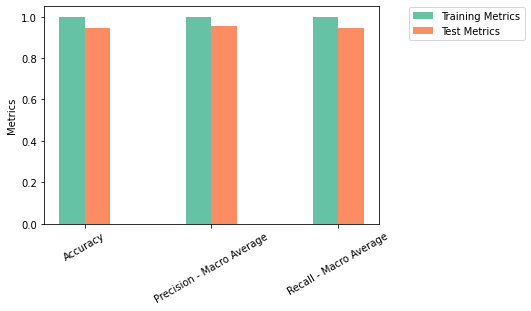

Confusion Matrix Report - Test Dataset

Calculate the confusion matrix of the model on the given dataset.

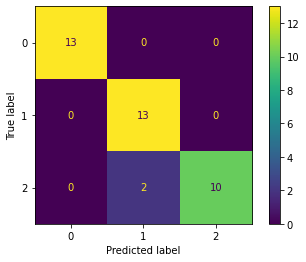

Simple Model Comparison

Compare given model score to simple model score (according to given model type).

The given model performs 2.77 times compared to the simple model using the Accuracy metric. RandomForestClassifier model prediction has achieved a score of 0.95 compared to Simple constant prediction which achieved a score of 0.34 on tested data.

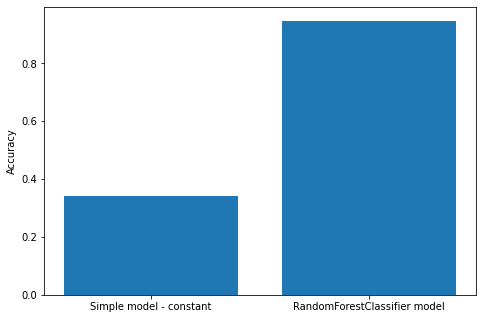

In [4]:
new_custom_suite.run(model=rf_clf, train_dataset=ds_train, test_dataset=ds_test, check_datasets_policy='test')

## Modify an Existing Suite

In [5]:
from deepchecks.suites import data_leakage_suite

customized_suite = data_leakage_suite()

# let's check what it has:
customized_suite

Data Leakage Suite: [
	0: TrainTestSamplesMix
		Conditions:
			0: Percentage of test data samples that appear in train data not greater than 10.00%
	1: SingleFeatureContribution(n_show_top=5)
		Conditions:
			0: Features' <a href=https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598>Predictive Power Score</a> (PPS) is not greater than 0.8
	2: SingleFeatureContributionTrainTest(n_show_top=5)
		Conditions:
			0: Train-Test features' <a href=https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598>Predictive Power Score</a> (PPS) difference is not greater than 0.2
]

In [6]:
# and modify it by removing a check by index:
customized_suite.remove(1)

Data Leakage Suite: [
	0: TrainTestSamplesMix
		Conditions:
			0: Percentage of test data samples that appear in train data not greater than 10.00%
	2: SingleFeatureContributionTrainTest(n_show_top=5)
		Conditions:
			0: Train-Test features' <a href=https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598>Predictive Power Score</a> (PPS) difference is not greater than 0.2
]

In [7]:
from deepchecks.checks import UnusedFeatures

# and add a new check with a condition:
customized_suite.add(
    UnusedFeatures().add_condition_number_of_high_variance_unused_features_not_greater_than())

Data Leakage Suite: [
	0: TrainTestSamplesMix
		Conditions:
			0: Percentage of test data samples that appear in train data not greater than 10.00%
	2: SingleFeatureContributionTrainTest(n_show_top=5)
		Conditions:
			0: Train-Test features' <a href=https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598>Predictive Power Score</a> (PPS) difference is not greater than 0.2
	3: UnusedFeatures(feature_importance_threshold=0.2, feature_variance_threshold=0.4, n_top_fi_to_show=5, n_top_unused_to_show=15, random_state=42)
		Conditions:
			0: Number of high variance unused features is not greater than 5
]

In [8]:
# lets remove all condition for the SingleFeatureContributionTrainTest:
customized_suite[2].clean_conditions()

# and update the suite's name:
customized_suite.name = 'New Data Methodology Suite'

New Data Methodology Suite 
 The suite is composed of various checks such as: Train Test Samples Mix, Single Feature Contribution Train Test, Unused Features, etc... 
 Each check may contain conditions (which results in 
 ✓ /
 ✖ /
 ! 
 ), as well as other outputs such as plots or tables. 
 Suites, checks and conditions can all be modified (see tutorial [link]). 
 Conditions Summary

Status,Check,Condition,More Info
✓,Train Test Samples Mix,Percentage of test data samples that appear in train data not greater than 10.00%,
✓,Unused Features,Number of high variance unused features is not greater than 5,


Additional Outputs

Train Test Samples Mix

Detect samples in the test data that appear also in training data.

2.63% (1.0 / 38) of test data samples appear in train data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
Test indices: 142,5.80,2.70,5.10,1.90,2
Train indices: 101,5.80,2.70,5.10,1.90,2


Single Feature Contribution Train-Test

Return the difference in PPS (Predictive Power Score) of all features between train and test datasets.

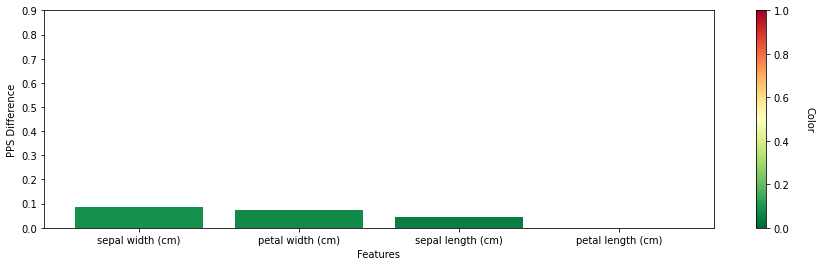

The PPS represents the ability of a feature to single-handedly predict another feature or label.

A high PPS (close to 1) can mean that this feature's success in predicting the label is actually due to data

leakage - meaning that the feature holds information that is based on the label to begin with.

When we compare train PPS to test PPS, A high difference can strongly indicate leakage, as a feature

that was powerful in train but not in test can be explained by leakage in train that is not relevant to a new dataset.

Unused Features

Detect features that are nearly unused by the model.

Features above the line are a sample of the most important features, while the features below the line are the unused features with highest variance, as defined by check parameters

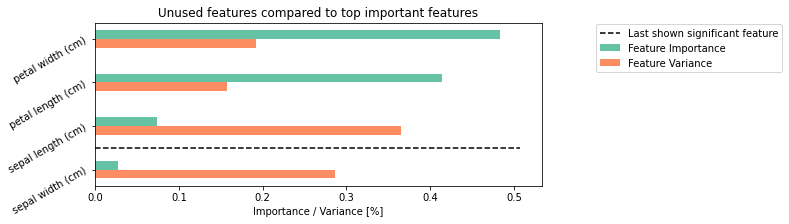

In [9]:
# and now we can run our modified suite:
customized_suite.run(ds_train, ds_test, rf_clf)